In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
sequence=np.array([i for i in range(1,101)])

In [3]:
window_size=3
X=[]
Y=[]
for i in range(len(sequence)-window_size):
    X.append(sequence[i:i+window_size])
    Y.append(sequence[i+window_size])
X=np.array(X)
Y=np.array(Y)

In [4]:
X=X.reshape((X.shape[0],X.shape[1],1))

In [5]:
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(window_size,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.fit(X,Y,epochs=1000,verbose=1)

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3569.4858
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3308.9055
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 3229.2349
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3085.9717
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 2887.5889 
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2787.5288 
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 2402.2300 
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2033.6318 
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1650.8970
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1117.5389
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 423.6230
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 17.5424
Epoch 13/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 125.4415
Epoch 14/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 130.8719 
Epoch 15/1000
4/4 ━━━━━━━━━━━

In [10]:
print("Training completed.")

Training completed.


In [11]:
test_input=np.array([34,35,36])
test_input=test_input.reshape((1,window_size,1))
predicted=model.predict(test_input,verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:36.98


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


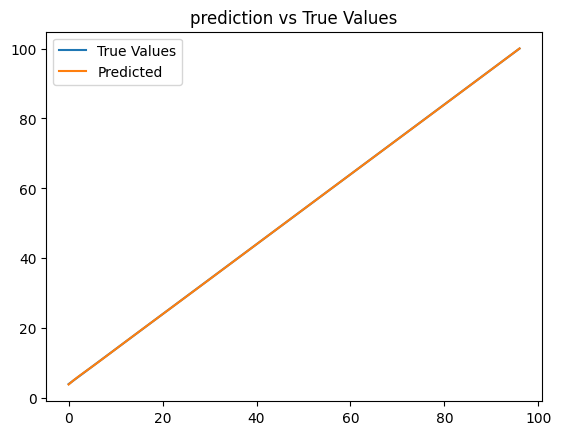

In [12]:
predictions=model.predict(X)
plt.plot(Y,label='True Values')
plt.plot(predictions,label='Predicted')
plt.legend()
plt.title("prediction vs True Values")
plt.show()